In [40]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x = t_x/255.0
s_tt_x=tt_x/255.0
from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_y = train_test_split(s_t_x,t_y ,test_size=0.2, random_state=42)
t_x.shape

(48000, 28, 28)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu',input_shape=(784,),name='hidden'))#은닉층
model.add(keras.layers.Dense(10,activation='softmax',name = 'output'))          
model.summary()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(t_x,t_y,epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5307 - accuracy: 0.8136
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3932 - accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3572 - accuracy: 0.8722
Epoch 4/5
150

In [3]:
model.evaluate(v_x,v_y)

375/375 [==============================] - 1s 735us/step - loss: 0.3540 - accuracy: 0.8796


[0.35404708981513977, 0.8795833587646484]

In [4]:
#학습 규칙 설정 출력 규칙설정, 컴파일:고급어를 기계어로 변환,규칙설정
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [5]:
sgd = keras.optimizers.SGD(learning_rate=0.1)
#분류기 
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [6]:
sgd = keras.optimizers.SGD(momentum=0.9,nesterov=True)

In [7]:
keras.optimizers.RMSprop

keras.optimizer_v2.rmsprop.RMSprop

In [8]:
keras.optimizers.Adagrad

keras.optimizer_v2.adagrad.Adagrad

In [9]:
model1 = keras.Sequential()
model1.add(keras.layers.Flatten(input_shape=(28,28)))
model1.add(keras.layers.Dense(100,activation='relu',input_shape=(784,),name='hidden'))#은닉층
model1.add(keras.layers.Dense(10,activation='softmax',name = 'output'))          
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model1.fit(s_tt_x,t_y,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2933 - accuracy: 0.8924
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2803 - accuracy: 0.8960
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2673 - accuracy: 0.9009
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9040
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2491 - accuracy: 0.9085


In [14]:
model.evaluate(v_x,v_y),model1.evaluate(v_x,v_y) #검증데이터점수

375/375 [==============================] - 0s 817us/step - loss: 0.3350 - accuracy: 0.8822


([0.35404708981513977, 0.8795833587646484],
 [0.33496177196502686, 0.8821666836738586])

In [15]:
t_x.shape

(48000, 28, 28)

In [17]:
m1 = keras.Sequential()#모델생성!
m1.add(keras.layers.Flatten(input_shape = (28,28)))#입력층 레이어 생성
m1.add(keras.layers.Dense(100,activation='relu'))
m1.add(keras.layers.Dense(300,activation='relu'))
m1.add(keras.layers.Dense(10,activation='softmax'))#종단 뉴런 층
m1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 300)               30300     
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 111,810
Trainable params: 111,810
Non-trainable params: 0
_________________________________________________________________


In [18]:
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history = m1.fit(t_x, t_y, epochs = 30, validation_data=(v_x,v_y))

Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5006 - accuracy: 0.8206 - val_loss: 0.4203 - val_accuracy: 0.8491
Epoch 2/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3700 - accuracy: 0.8644 - val_loss: 0.3696 - val_accuracy: 0.8654
Epoch 3/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3340 - accuracy: 0.8758 - val_loss: 0.3684 - val_accuracy: 0.8671
Epoch 4/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3076 - accuracy: 0.8855 - val_loss: 0.3550 - val_accuracy: 0.8710
Epoch 5/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2918 - accuracy: 0.8908 - val_loss: 0.3556 - val_accuracy: 0.8724
Epoch 6/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2761 - accuracy: 0.8965 - val_loss: 0.3365 - val_accuracy: 0.8813
Epoch 7/30
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2647 - accuracy: 0.9001 - val_loss: 0.3499 - val_accuracy:

In [19]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1500}

In [21]:
history.history.keys() #

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0.0, 1.0)

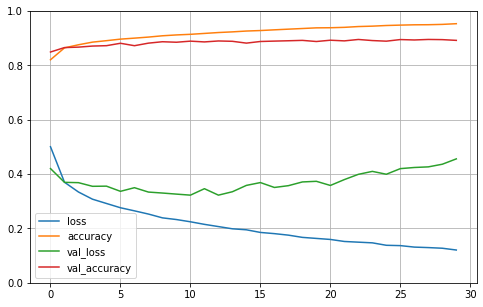

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
#과대적합됨

In [26]:
m2 = keras.Sequential()#모델생성!
m2.add(keras.layers.Flatten(input_shape = (28,28)))#입력층 레이어 생성
m2.add(keras.layers.Dense(300,activation='relu'))
m2.add(keras.layers.Dense(100,activation='relu'))
m2.add(keras.layers.Dense(10,activation='softmax'))#종단 뉴런 층
m2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history1 = m2.fit(t_x, t_y, epochs = 20, validation_data=(v_x,v_y))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4907 - accuracy: 0.8228 - val_loss: 0.4274 - val_accuracy: 0.8477
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3707 - accuracy: 0.8633 - val_loss: 0.3814 - val_accuracy: 0.8597
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3312 - accuracy: 0.8779 - val_loss: 0.3457 - val_accuracy: 0.8732
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3089 - accuracy: 0.8857 - val_loss: 0.3399 - val_accuracy: 0.8780
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2914 - accuracy: 0.8907 - val_loss: 0.3363 - val_accuracy: 0.8771
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.8978 - val_loss: 0.3501 - val_accuracy: 0.8756
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2598 - accuracy: 0.9021 - val_loss: 0.3540 - val_accuracy:

(0.0, 1.0)

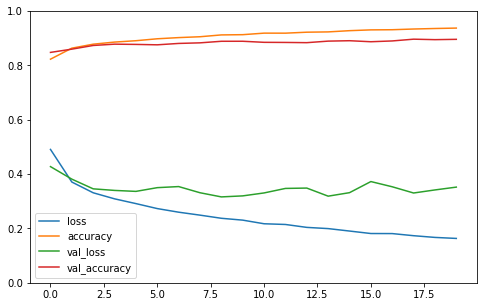

In [31]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)

In [32]:
m3 = keras.Sequential()#모델생성!
m3.add(keras.layers.Flatten(input_shape = (28,28)))#입력층 레이어 생성
m3.add(keras.layers.Dense(300,activation='relu'))
m3.add(keras.layers.Dense(100,activation='relu'))
m3.add(keras.layers.Dense(10,activation='softmax'))#종단 뉴런 층
m3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
m3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
history2 = m3.fit(t_x, t_y, epochs = 20, validation_data=(v_x,v_y))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7388 - accuracy: 0.7534 - val_loss: 0.5475 - val_accuracy: 0.8117
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4990 - accuracy: 0.8267 - val_loss: 0.4881 - val_accuracy: 0.8305
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4526 - accuracy: 0.8414 - val_loss: 0.4562 - val_accuracy: 0.8400
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4243 - accuracy: 0.8515 - val_loss: 0.4213 - val_accuracy: 0.8515
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4050 - accuracy: 0.8578 - val_loss: 0.4040 - val_accuracy: 0.8572
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3886 - accuracy: 0.8638 - val_loss: 0.4042 - val_accuracy: 0.8573
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3746 - accuracy: 0.8679 - val_loss: 0.3977 - val_accuracy:

(0.0, 1.0)

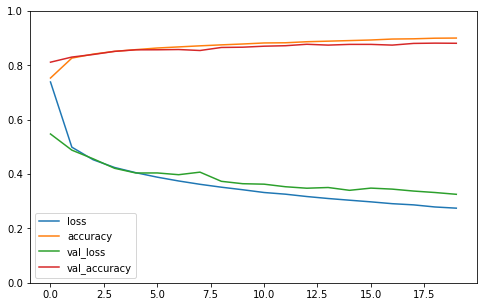

In [34]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
#loss 가 안떨어지면 기울기를 못찾는중일 것

In [35]:
m3.evaluate(tt_x,tt_y)

313/313 [==============================] - 1s 2ms/step - loss: 72.8005 - accuracy: 0.8272


[72.80054473876953, 0.8271999955177307]

In [36]:
m2.evaluate(tt_x,tt_y)

313/313 [==============================] - 1s 1ms/step - loss: 78.9014 - accuracy: 0.8665


[78.90141296386719, 0.8665000200271606]

In [38]:
m1.evaluate(tt_x,tt_y)

313/313 [==============================] - 0s 1ms/step - loss: 153.7139 - accuracy: 0.8520


[153.7139434814453, 0.8519999980926514]